# 여행 상품 신청 여부 예측

## 1. 데이터 읽기

In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [2]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [4]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


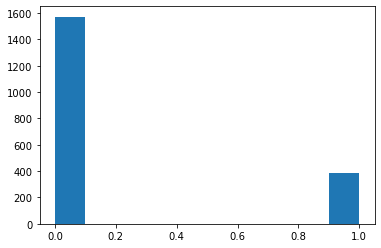

In [5]:
import matplotlib.pyplot as plt

plt.hist(train.ProdTaken)
plt.show()

- 여행 상품을 신청하지 않은 사람들(0)이 신청한 사람들(1)에 비해 약 3배 가량 많은 모습을 볼 수 있음

## 2. 데이터 전처리

### 문자형 결측치 처리

In [6]:
train['Gender'].replace('Fe Male', 'Female', inplace = True)
test['Gender'].replace('Fe Male', 'Female', inplace = True)

### 결측치 처리

In [7]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [8]:
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            # 문자형 칼럼의 경우 'Unknown'을 채우기
            value = 'Unknown'
            temp.loc[:,col] = temp[col].fillna(value)
        elif dtype == int or dtype == float:
            # 수치형 칼럼의 경우 0을 채우기
            value = 0
            temp.loc[:,col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [9]:
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

train_nona[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


### 성별 오타 수정

In [10]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_nona['TypeofContact'])
encoder.transform(train_nona['TypeofContact'])

array([0, 1, 0, ..., 0, 1, 0])

In [11]:
train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [12]:
# test 데이터에도 결측치 처리
test = handle_na(test)

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 함
    test[o_col] = encoder.transform(test[o_col])

test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [13]:
train_enc.describe()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,978.000000,35.660870,0.715601,1.641432,14.714066,2.338107,0.617391,2.922762,3.693606,1.172890,3.550384,1.275192,3.160614,0.291049,3.067519,0.619437,1.196419,1.731458,22415.714578,0.195908
std,564.504207,12.027437,0.462445,0.908744,8.653313,0.627545,0.486148,0.712276,1.045405,1.270394,0.831133,0.933826,1.870085,0.454362,1.372915,0.485649,0.865161,0.954978,7568.865432,0.397000
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,489.500000,30.000000,0.000000,1.000000,9.000000,2.000000,0.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,19864.000000,0.000000
50%,978.000000,36.000000,1.000000,1.000000,13.000000,2.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,21931.000000,0.000000
75%,1466.500000,43.000000,1.000000,3.000000,19.000000,3.000000,1.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25401.500000,0.000000
max,1955.000000,61.000000,2.000000,3.000000,36.000000,3.000000,1.000000,5.000000,6.000000,4.000000,5.000000,3.000000,19.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000,1.000000


### 변수 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_enc)
train_enc_scaler = scaler.transform(train_enc)

In [15]:
train_enc_scaler = pd.DataFrame(train_enc_scaler, columns=train_enc.columns)

In [16]:
train_enc_scaler

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,0.000000,0.459016,0.0,0.0,0.277778,1.000000,1.0,0.50,0.666667,0.00,0.6,0.333333,0.157895,0.0,0.00,0.0,0.333333,0.25,0.206571,0.0
1,0.000512,0.557377,0.5,1.0,0.000000,1.000000,0.0,0.25,0.666667,0.25,0.8,0.666667,0.052632,1.0,1.00,1.0,0.000000,0.50,0.198616,1.0
2,0.001024,0.737705,0.0,0.0,0.000000,0.666667,1.0,0.25,0.500000,0.25,0.8,0.333333,0.105263,0.0,0.75,1.0,0.000000,0.50,0.000000,0.0
3,0.001535,0.475410,0.0,0.0,0.194444,1.000000,1.0,0.50,0.833333,0.00,0.8,0.333333,0.157895,0.0,0.75,0.0,0.333333,0.25,0.215590,1.0
4,0.002047,0.688525,0.5,1.0,0.166667,0.666667,1.0,0.25,0.500000,0.25,0.6,0.000000,0.105263,0.0,0.50,1.0,0.000000,0.50,0.201737,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0.997953,0.459016,0.5,0.0,0.277778,1.000000,1.0,0.50,0.833333,0.00,0.6,0.666667,0.105263,0.0,0.00,1.0,0.666667,0.25,0.210006,0.0
1951,0.998465,0.672131,0.5,1.0,0.222222,0.666667,0.0,0.50,0.500000,1.00,1.0,0.000000,0.052632,0.0,1.00,1.0,0.333333,0.00,0.320183,0.0
1952,0.998976,0.622951,0.0,1.0,0.777778,1.000000,0.0,0.50,0.666667,0.00,0.6,0.000000,0.368421,0.0,0.25,1.0,0.666667,0.25,0.219411,0.0
1953,0.999488,0.459016,0.5,1.0,0.833333,1.000000,0.0,0.50,0.833333,0.25,0.6,0.333333,0.157895,0.0,0.00,1.0,0.666667,0.50,0.225157,0.0


### 상관관계 확인

In [17]:
train_enc_scaler.corr()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,1.000000,0.022279,0.027679,-0.022072,-0.002714,0.009382,0.007070,0.036337,0.001002,0.017948,-0.004462,-0.006600,0.035136,0.009294,-0.040459,-0.013982,0.022031,0.012700,0.032371,-0.048933
Age,0.022279,1.000000,-0.016889,0.037846,0.040377,-0.007515,-0.006535,0.128067,0.094505,0.439225,-0.059289,-0.043039,0.145950,0.012639,0.020727,0.051140,0.111162,0.195957,0.544905,-0.101083
TypeofContact,0.027679,-0.016889,1.000000,-0.006532,-0.010612,0.017613,-0.026703,-0.004574,-0.057540,0.013177,0.029311,-0.043840,0.003137,-0.036966,-0.042286,0.016879,-0.018919,0.025136,-0.008920,-0.047598
CityTier,-0.022072,0.037846,-0.006532,1.000000,0.038109,0.159750,-0.029202,0.018071,0.021127,0.160561,-0.010286,0.016228,-0.014277,0.013665,-0.028168,0.014177,0.021930,0.141385,0.048090,0.085583
DurationOfPitch,-0.002714,0.040377,-0.010612,0.038109,1.000000,0.035624,0.007557,0.143880,0.071662,0.072980,-0.015323,0.022092,0.048285,0.048381,0.006623,-0.030169,0.082222,-0.009606,0.155673,0.069795
Occupation,0.009382,-0.007515,0.017613,0.159750,0.035624,1.000000,0.001517,0.004642,-0.026113,0.031275,0.027666,-0.042706,-0.032778,-0.006072,-0.032450,-0.025941,0.005813,0.000432,-0.024702,-0.042101
Gender,0.007070,-0.006535,-0.026703,-0.029202,0.007557,0.001517,1.000000,0.007724,-0.044491,-0.040337,0.005936,-0.026104,0.025973,-0.016903,0.006521,-0.031779,0.037625,-0.035131,-0.005363,0.019991
NumberOfPersonVisiting,0.036337,0.128067,-0.004574,0.018071,0.143880,0.004642,0.007724,1.000000,0.331093,-0.054800,-0.001636,0.032742,0.171838,0.023638,-0.012981,0.018545,0.600986,-0.007937,0.253358,0.006483
NumberOfFollowups,0.001002,0.094505,-0.057540,0.021127,0.071662,-0.026113,-0.044491,0.331093,1.000000,0.036054,-0.052021,0.084318,0.099267,0.010061,-0.003051,0.053468,0.276501,0.057487,0.205494,0.102778
ProductPitched,0.017948,0.439225,0.013177,0.160561,0.072980,0.031275,-0.040337,-0.054800,0.036054,1.000000,-0.018433,-0.059970,0.001015,-0.022497,-0.010217,0.086790,-0.055126,0.353400,0.532498,-0.150399


## 3. 모델링

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [19]:
train = train_enc.drop(columns=['id'])
test = test.drop(columns=['id'])

x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [20]:
# 모델 학습
model.fit(x_train,y_train)

<ipython-input-20-bc4642d15b06>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [21]:
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 0 0 0 1 0 0 1 0 0]


In [22]:
sample_submission['ProdTaken'] = prediction
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [23]:
sample_submission.to_csv('submission.csv',index = False)

-------------------

## 후진선택법

In [24]:
def processSubset(X,y,feature_set):
    X = sm.add_constant(X ,has_constant = "add")
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [25]:
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model

In [26]:
def backward_model(X,y):
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=x_train, y= y_train, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])

In [27]:
import time
import statsmodels.api as sm
import itertools
Backward_best_model = backward_model(X=x_train, y= y_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Processed  18 models on 17 predictors in 0.21091437339782715
Selected predictors: ['Age', 'CityTier', 'Designation', 'DurationOfPitch', 'Gender', 'MaritalStatus', 'NumberOfChildrenVisiting', 'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfTrips', 'Occupation', 'OwnCar', 'Passport', 'PitchSatisfactionScore', 'PreferredPropertyStar', 'ProductPitched', 'TypeofContact', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019733DD3670>
Processed  17 models on 16 predictors in 0.32516980171203613
Selected predictors: ['Age', 'CityTier', 'Designation', 'DurationOfPitch', 'Gender', 'MaritalStatus', 'NumberOfChildrenVisiting', 'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfTrips', 'Occupation', 'OwnCar', 'Passport', 'PitchSatisfactionScore', 'PreferredPropertyStar', 'ProductPitched', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000019733DD25E0>
Processed  16 models on 15 predictors in 0.250319

In [28]:
backward_cols = ['CityTier', 'Designation', 'DurationOfPitch', 'MaritalStatus', 'NumberOfFollowups', 'NumberOfPersonVisiting', 'NumberOfTrips', 'Occupation', 'Passport', 'PitchSatisfactionScore', 'PreferredPropertyStar', 'ProductPitched']

In [29]:
x_train[backward_cols]

,CityTier,Designation,DurationOfPitch,MaritalStatus,NumberOfFollowups,NumberOfPersonVisiting,NumberOfTrips,Occupation,Passport,PitchSatisfactionScore,PreferredPropertyStar,ProductPitched
0,1,1,10.0,1,4.0,3,3.0,3,0,1,3.0,0
1,3,2,0.0,2,4.0,2,1.0,3,1,5,4.0,1
2,1,2,0.0,1,3.0,2,2.0,2,0,4,4.0,1
3,1,1,7.0,1,5.0,3,3.0,3,0,4,4.0,0
4,3,2,6.0,0,3.0,2,2.0,2,0,3,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1,1,10.0,2,5.0,3,2.0,3,0,1,3.0,0
1951,3,0,8.0,0,3.0,3,1.0,2,0,5,5.0,4
1952,3,1,28.0,0,4.0,3,7.0,3,0,2,3.0,0
1953,3,2,30.0,1,5.0,3,3.0,3,0,1,3.0,1


In [30]:
backward_cols

['CityTier',
 'Designation',
 'DurationOfPitch',
 'MaritalStatus',
 'NumberOfFollowups',
 'NumberOfPersonVisiting',
 'NumberOfTrips',
 'Occupation',
 'Passport',
 'PitchSatisfactionScore',
 'PreferredPropertyStar',
 'ProductPitched']

In [31]:
model.fit(x_train[backward_cols], y_train)

<ipython-input-31-afb7cb4b8dd4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train[backward_cols], y_train)


RandomForestClassifier(random_state=42)

In [32]:
prediction = model.predict(test[backward_cols])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 0 0 0 1 0 0 1 0 0]


In [33]:
sample_submission['ProdTaken'] = prediction
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [34]:
sample_submission.to_csv('submission.csv',index = False)